In [2]:
from skimage import data
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [9]:
import tensorflow as tf

In [3]:
img = data.camera().astype(np.float32)

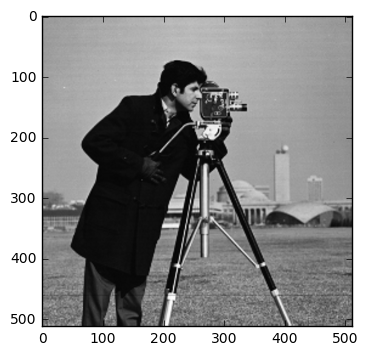

In [5]:
plt.imshow(img, cmap='gray')

In [6]:
img.shape

(512, 512)

In [7]:
#for tensoflow convolutional image needs to be 4d
img_4d = img.reshape([1, img.shape[0], img.shape[1], 1])

In [8]:
print(img_4d.shape)

(1, 512, 512, 1)


In [10]:
img_4d = tf.reshape(img, [1, img.shape[0], img.shape[1], 1])

In [12]:
img_4d

<tf.Tensor 'Reshape:0' shape=(1, 512, 512, 1) dtype=float32>

In [13]:
img_4d.get_shape().as_list()

[1, 512, 512, 1]

In [15]:
mean = 0
sigma = 1.0
x = tf.linspace(-3.0, 3.0, 100)
z = (tf.exp(tf.neg(tf.pow(x - mean, 2) /
                          (2.0 * tf.pow(sigma, 2.0)))) * 
                          (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))

In [16]:
ksize = z.get_shape().as_list()[0]
z_2d = tf.matmul(tf.reshape(z, [ksize,1]), tf.reshape(z, [1,ksize]))

In [17]:
z_4d = tf.reshape(z_2d, [ksize,ksize,1,1])

In [18]:
print(z_4d.get_shape().as_list())

[100, 100, 1, 1]


In [22]:
convolved = tf.nn.conv2d(img_4d, z_4d, strides=[1,1,1,1], padding='SAME')

In [26]:
sess = tf.InteractiveSession()
res = convolved.eval()

In [28]:
print(res.shape)

(1, 512, 512, 1)


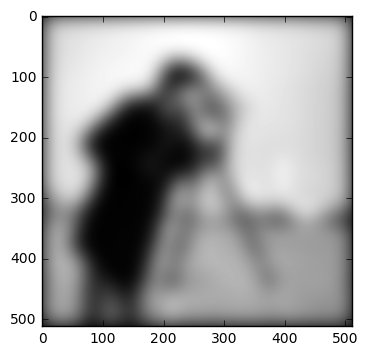

In [29]:
plt.imshow(np.squeeze(res), cmap='gray')

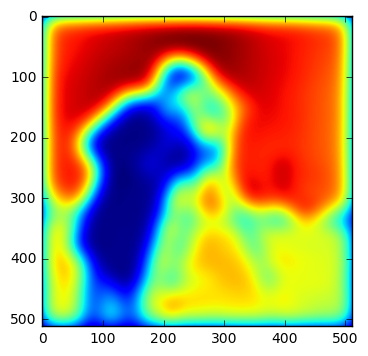

In [30]:
plt.imshow(res[0,:,:,0])

In [32]:
xs = tf.linspace(-3.0, 3.0, ksize)

In [33]:
ys = tf.sin(xs)

In [34]:
plt.figure()

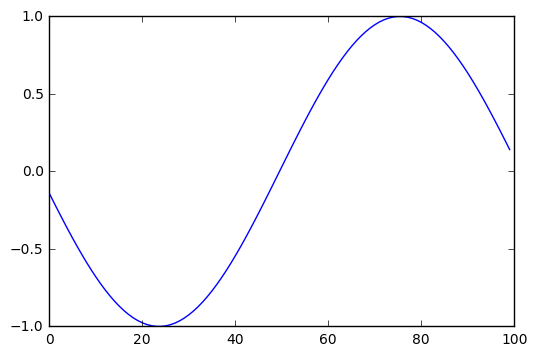

In [35]:
plt.plot(ys.eval())

In [36]:
ys = tf.reshape(ys, [ksize,1])

In [37]:
ones = tf.ones((1,ksize))

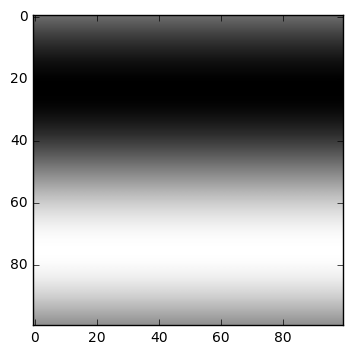

In [40]:
wave = tf.matmul(ys, ones)
plt.imshow(wave.eval(), cmap='gray')

In [41]:
gabor = tf.matmul(wave, z_2d)

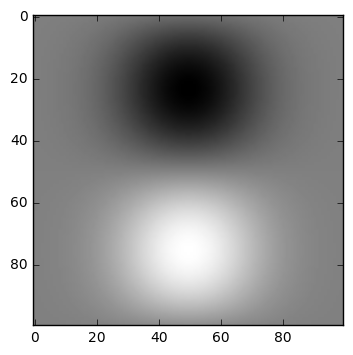

In [43]:
plt.imshow(gabor.eval(), cmap='gray')

In [46]:
img = tf.placeholder(tf.float32, shape=[None,None], name='img')

In [47]:
img_3d = tf.expand_dims(img, 2)

In [48]:
dims = img_3d.get_shape()

In [49]:
img_4d = tf.expand_dims(img_3d,0)

In [50]:
print(img_4d.get_shape().as_list())

[1, None, None, 1]


In [52]:
mean = tf.placeholder(tf.float32, name='mean')
sigma = tf.placeholder(tf.float32, name='sigma')
ksize = tf.placeholder(tf.int32, name='ksize')

In [53]:
x = tf.linspace(-3.0, 3.0, ksize)

In [57]:
z = (tf.exp(tf.neg(tf.pow(x - mean, 2) /
                          (2.0 * tf.pow(sigma, 2.0)))) * 
                          (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))

In [58]:
z_2d = tf.matmul(tf.reshape(z, tf.pack([ksize,1])), 
                 tf.reshape(z, tf.pack([1,ksize])))

In [64]:
ys = tf.sin(x)
ys = tf.reshape(ys, shape=[ksize, 1])

In [65]:
ones = tf.ones(tf.pack([1, ksize]))
wave = tf.matmul(ys, ones)

In [66]:
gabor = tf.mul(wave, z_2d)

In [67]:
gabor_4d = tf.reshape(gabor, shape=[ksize, ksize,1,1])

In [68]:
convolved = tf.nn.conv2d(img_4d, gabor_4d, strides=[1,1,1,1], padding='SAME')

In [69]:
convolved_img = convolved[0, :, :, 0]

In [74]:
res = convolved_img.eval(feed_dict={img:data.camera(), mean:0, sigma:0.5, ksize:32})

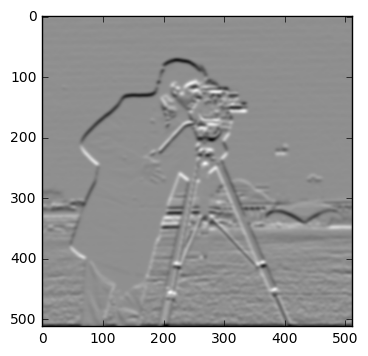

In [75]:
plt.imshow(res, cmap='gray')